## Lab Assignment Five: Wide and Deep Network Architectures
GROUP MEMBERS:
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Sources
1. ChatGPT (For formatting text and plots)

### Preparation (4 pts total)

#### Part One (1 pts)

In [17]:
import numpy as np
import pandas as pd

# load the dataset and display basic info
df = pd.read_csv("../dataset/diabetes_prediction_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
from sklearn.preprocessing import StandardScaler

# data proprocessing
# encode gender (1 for male and 0 for female) and drop rows with missing gender
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})
df = df.dropna(subset=["gender"])

# one hot encode smoking history 
df = pd.get_dummies(df, columns=["smoking_history"], drop_first=True, dtype=float)

# Scale numerical columns
num_cols = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.info()
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99982 non-null  float64
 1   age                          99982 non-null  float64
 2   hypertension                 99982 non-null  float64
 3   heart_disease                99982 non-null  float64
 4   bmi                          99982 non-null  float64
 5   HbA1c_level                  99982 non-null  float64
 6   blood_glucose_level          99982 non-null  float64
 7   diabetes                     99982 non-null  int64  
 8   smoking_history_current      99982 non-null  float64
 9   smoking_history_ever         99982 non-null  float64
 10  smoking_history_former       99982 non-null  float64
 11  smoking_history_never        99982 non-null  float64
 12  smoking_history_not current  99982 non-null  float64
dtypes: float64(12), int64

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.692577,-0.284467,4.935916,-0.321051,1.001692,0.047709,0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.537899,-0.284467,-0.202597,-0.000114,1.001692,-1.426157,0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.616779,-0.284467,-0.202597,-0.000114,0.161089,0.489869,0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.261494,-0.284467,-0.202597,-0.583225,-0.492714,0.416175,0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.514935,3.515345,4.935916,-1.081957,-0.679515,0.416175,0,1.0,0.0,0.0,0.0,0.0


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,99982.000000,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.414375,-1.141337e-16,6.733604e-17,-6.961907e-17,1.885765e-16,7.179195e-16,3.141164e-17,0.085015,0.092877,0.040037,0.093537,0.350983,0.064402
std,0.492616,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.278906,0.290261,0.196047,0.291185,0.477280,0.245468
min,0.000000,-1.856726e+00,-2.844671e-01,-2.025966e-01,-2.608291e+00,-1.893720e+00,-1.426157e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.944220e-01,-2.844671e-01,-2.025966e-01,-5.561032e-01,-6.795148e-01,-9.348685e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.938133e-02,-2.844671e-01,-2.025966e-01,-1.139908e-04,2.544890e-01,4.770878e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.043633e-01,-2.844671e-01,-2.025966e-01,3.404106e-01,6.280905e-01,5.144330e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.692577e+00,3.515345e+00,4.935916e+00,1.030151e+01,3.243301e+00,3.978018e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Final Dataset Description**

The dataset used for this lab is the [**Diabetes Prediction Dataset** from Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), which contains health and lifestyle information for 100,000 individuals. The prediction task is **binary classification**: given a person’s demographics and medical measurements, predict whether they have diabetes (`diabetes = 1`) or not (`diabetes = 0`). During preprocessing, we (1) encoded `gender` as a binary categorical variable (Male = 1, Female = 0), (2) expanded `smoking_history` into multiple binary categorical indicators via one-hot encoding, (3) scaled continuous numerical features, and (4) dropped rows with missing `gender`. The final dataset contains **99,982 rows** and **13 variables**, all in model-ready numeric form, but their **logical** data types are described below.

| **Column**                     | **Data Type** | **Discussion** |
|--------------------------------|--------------------------|----------------|
| `gender`                       | Categorical (binary)     | Encoded as 1 for Male and 0 for Female; represents biological sex. |
| `age`                          | Numeric (continuous)     | Standardized age of the individual; age is a known diabetes risk factor. |
| `hypertension`                 | Categorical (binary)     | 0 = No hypertension, 1 = Has hypertension; medical condition often co-occurs with diabetes. |
| `heart_disease`                | Categorical (binary)     | 0 = No heart disease, 1 = Has heart disease; may indicate comorbidities. |
| `bmi`                          | Numeric (continuous)     | Body Mass Index; standardized; higher BMI is often associated with diabetes risk. |
| `HbA1c_level`                  | Numeric (continuous)     | Average blood sugar over 2–3 months; strong clinical signal for diabetes. |
| `blood_glucose_level`          | Numeric (continuous)     | Current blood glucose measurement; high values correlate with diabetes. |
| `smoking_history_current`      | Categorical (binary)     | 1 if currently smokes; created from one-hot encoding of `smoking_history`. |
| `smoking_history_ever`         | Categorical (binary)     | 1 if has ever smoked; created from one-hot encoding. |
| `smoking_history_former`       | Categorical (binary)     | 1 if smoked in the past but not currently. |
| `smoking_history_never`        | Categorical (binary)     | 1 if never smoked. |
| `smoking_history_not current`  | Categorical (binary)     | 1 if smoked before but not currently (other non-current patterns). |
| `diabetes`                     | Categorical (binary)     | Target variable: 1 = diabetic, 0 = non-diabetic. |

#### Part Two (1 pts)

**Feature Crosses and Justification**

Feature crossing helps the model capture meaningful interactions between attributes. In this dataset, the following features should be crossed:

- **`age` × `bmi`** — Older individuals with higher BMI face greater diabetes risk, so their interaction is informative.  
- **`hypertension` × `heart_disease`** — These comorbid conditions often occur together and jointly increase diabetes likelihood.  
- **`gender` × `smoking_history_*`** — Smoking effects can differ by gender, making this cross useful.

Features such as **`smoking_history_*` with each other** should **not** be crossed because they are mutually exclusive one-hot indicators. Crossing too many continuous variables was also avoided to prevent unnecessary dimensionality and redundancy.

#### Part Three (1 pts)

**Evaluation Metric and Rationale**

The primary evaluation metric for this diabetes prediction task will be **Recall**. In a healthcare context, failing to identify a person who actually has diabetes (a false negative) is much more harmful than incorrectly predicting diabetes for a healthy individual (a false positive). High recall ensures that most diabetic patients are detected for further testing or medical follow-up, even if it slightly increases false alarms. Accuracy alone is not suitable here because the dataset is somewhat imbalanced and may obscure poor detection of the positive (diabetic) class. Therefore, recall is the most appropriate measure for this classification problem.

#### Part Four (1 pts)

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Separate features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# --- Stratified 80/20 train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# --- Stratified 5-fold cross-validation setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print(f"Fold {fold}: Train size = {len(train_idx)}, Validation size = {len(val_idx)}")

Training set size: (79985, 12)
Testing set size: (19997, 12)
Fold 1: Train size = 63988, Validation size = 15997
Fold 2: Train size = 63988, Validation size = 15997
Fold 3: Train size = 63988, Validation size = 15997
Fold 4: Train size = 63988, Validation size = 15997
Fold 5: Train size = 63988, Validation size = 15997


**Data Splitting Method and Justification**

The dataset will be divided using **Stratified 80/20 train–test split** along with **Stratified 5-fold cross-validation** on the training set. Stratification ensures that the proportion of diabetic and non-diabetic cases remains consistent across all folds, which is crucial because the dataset is slightly imbalanced. This approach provides reliable estimates of model performance and prevents biased evaluation toward the majority (non-diabetic) class.

The **80/20 split** simulates a realistic deployment scenario — training the model on historical data and evaluating it on unseen patients — while **cross-validation** improves robustness by averaging results across multiple subsets. This mirrors practical healthcare settings, where a model would be trained on known patient data and then applied to new, unseen individuals to predict diabetes risk.

### Modeling (5 pts total)

#### Part One (2 pts)

Model 1 (64,32,dropout=0.2): Best Validation Recall = 0.6694
Model 2 (128,64,dropout=0.3): Best Validation Recall = 0.6723
Model 3 (32,16,dropout=0.1): Best Validation Recall = 0.6664


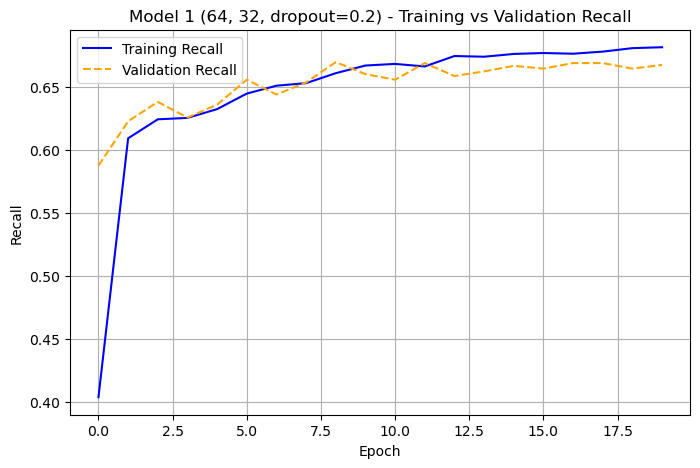

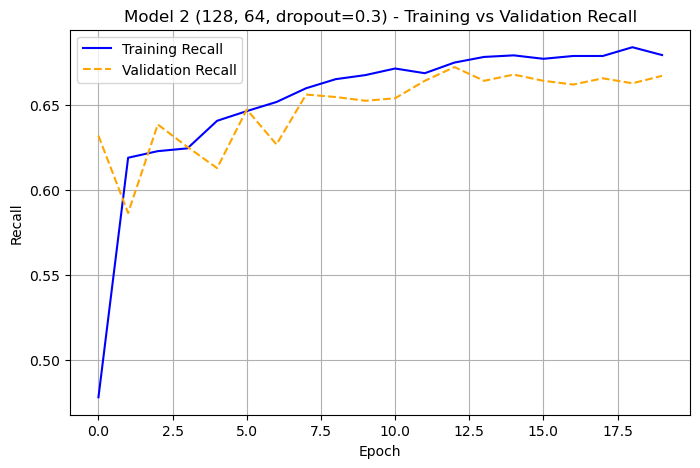

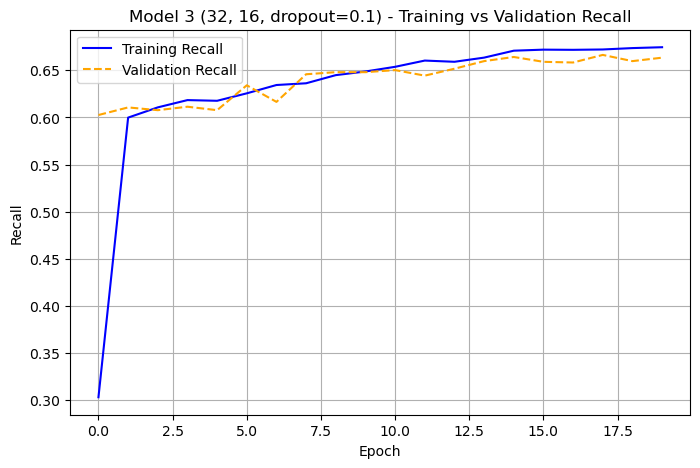

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]

# --- Function to build wide + deep models ---
def build_wide_deep_model(hidden_units=[64, 32], dropout_rate=0.2):
    inputs = keras.Input(shape=(input_dim,))

    # Wide part (linear)
    wide_output = inputs  # directly connected to output later

    # Deep part (dense layers)
    x = layers.Dense(hidden_units[0], activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(hidden_units[1], activation='relu')(x)

    # Combine wide + deep
    combined = layers.concatenate([wide_output, x])
    outputs = layers.Dense(1, activation='sigmoid')(combined)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    return model


# --- Model 1: Baseline ---
model1 = build_wide_deep_model(hidden_units=[64, 32], dropout_rate=0.2)
history1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Model 2: Deeper network ---
model2 = build_wide_deep_model(hidden_units=[128, 64], dropout_rate=0.3)
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)

# --- Model 3: Shallower + smaller dropout ---
model3 = build_wide_deep_model(hidden_units=[32, 16], dropout_rate=0.1)
history3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    verbose=0
)


# --- Print best validation recall for each model ---
def summarize_best_recall(history, name):
    best_recall = max(history.history['val_recall'])
    print(f"{name}: Best Validation Recall = {best_recall:.4f}")

summarize_best_recall(history1, "Model 1 (64,32,dropout=0.2)")
summarize_best_recall(history2, "Model 2 (128,64,dropout=0.3)")
summarize_best_recall(history3, "Model 3 (32,16,dropout=0.1)")

# --- Helper to plot training vs validation recall for one model ---
def plot_single_history(history, title, metric='recall'):
    plt.figure(figsize=(8,5))
    plt.plot(history.history[metric], label='Training ' + metric.title(), color='blue')
    plt.plot(history.history[f'val_{metric}'], label='Validation ' + metric.title(), linestyle='--', color='orange')
    plt.title(f'{title} - Training vs Validation {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot each model separately ---
plot_single_history(history1, "Model 1 (64, 32, dropout=0.2)", metric='recall')
plot_single_history(history2, "Model 2 (128, 64, dropout=0.3)", metric='recall')
plot_single_history(history3, "Model 3 (32, 16, dropout=0.1)", metric='recall')

#### Part Two (2 pts)

#### Part Three (1 pts)

### Exceptional Work (1 pts total)
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.